# Deaths registered monthly in England and Wales

I-Hsuan Lin

University of Manchester

February 19, 2022

## 1. Introduction

This notebook shows how to use `readxl` package to retreive the *Deaths registered monthly in England and Wales* Dataset from [Office for National Statistics](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/monthlyfiguresondeathsregisteredbyareaofusualresidence) and create various plots to show the number of deaths with `ggplot2`.

Source: [Office for National Statistics](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/monthlyfiguresondeathsregisteredbyareaofusualresidence)

### About this dataset

> Number of deaths registered each month by area of usual residence for England and Wales, by region, county, local and unitary authority, and London borough. These are monthly provisional data covering the month before release and do not include the most up-to-date figures on deaths registered involving coronavirus (COVID-19); see our weekly deaths data.

### Important notes and usage information

> If you are looking for the latest data on deaths involving the coronavirus (COVID-19) registered in England and Wales, please see our [weekly provisional deaths dataset](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales).

### Main points from latest release

>- The provisional number of deaths registered in England and Wales in December 2021 was 52,859; this represents an increase of 1,257 deaths in comparison with the previous month and a decrease of 3,813 deaths in comparison with the same month in 2020.
>- Moveable public holidays and the number of weekends, when register offices are closed, affect the number of registrations made in the published months and in the corresponding months in previous years.
>- Local authorities' codes and names have been updated to reflect the changes that occurred in April 2021.

## 2. Loading required libraries

In [1]:
library(readxl)
library(ggplot2)
library(scales)
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()



## 3. Set output parameters

In [2]:
# Set width
options(width = 110)

# Set output image size
options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 150)

## 4. Retrieve datasets

### Set file URLs

In [3]:
ons <- "https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/monthlyfiguresondeathsregisteredbyareaofusualresidence"

f2006 <- paste0(ons,"/2006/publishedoutput200tcm772274163.xls")
f2007 <- paste0(ons,"/2007/publishedoutput200tcm772274233.xls")
f2008 <- paste0(ons,"/2008/publishedoutput200tcm772274292.xls")
f2009 <- paste0(ons,"/2009/publishedoutput200tcm772274362.xls")
f2010 <- paste0(ons,"/2010/publishedoutputfeb021tcm772274383.xls")
f2011 <- paste0(ons,"/2011/publishedoutput2011finaltcm772738151.xls")
f2012 <- paste0(ons,"/2012/publishedoutput2012finaltcm773197501.xls")
f2013 <- paste0(ons,"/2013/publishedoutput2013finaltcm773717241.xls")
f2014 <- paste0(ons,"/2014/publishedoutput2014finaltcm774115982.xls")
f2015 <- paste0(ons,"/2015/publishedoutput2015final.xls")
f2016 <- paste0(ons,"/2016/publishedoutput2016final.xls")
f2017 <- paste0(ons,"/2017/publishedoutputannual2017final.xls")
f2018 <- paste0(ons,"/2018/publishedannual2018.xls")
f2019 <- paste0(ons,"/2019/annual2019publishedoutputrefresh.xls")
f2020 <- paste0(ons,"/2020/annual2020publishedoutputrefresh.xls")
f2021 <- paste0(ons,"/2021/deathsregisteredmonthlyusualareaofresidenceenglandandwales.xlsx") # Release date: 21 January 2022

### Download datasets

In [4]:
years <- 2006:2021
files <- c(f2006, f2007, f2008, f2009, f2010, f2011, f2012, f2013, 
           f2014, f2015, f2016, f2017, f2018, f2019, f2020, f2021)
select <- "TOTAL REGISTRATIONS|ENGLAND, WALES AND ELSEWHERE"

data <- data.frame(matrix(NA, nrow = 0, ncol = 12), stringsAsFactors = FALSE)

for(i in 1:length(files)) {
    file <- files[i]
    filename <- paste0("Y", years[i], ".", tools::file_ext(file))
    
    if(!file.exists(filename)) {
        # Download excel file using command line tool curl
        download.file(url = file, destfile = filename, method = "curl")
    }
    
    # Pick relevant data row from the the selected sheet, and store as data.frame
    n <- read_excel(filename, sheet = paste0("Figures for ", years[i]),
                        .name_repair =  ~ make.names(.x, unique = TRUE)) %>% rename(Contents = 1) %>% 
    filter(grepl(select, X) | grepl(select, Contents)) %>% select_if(~any(grepl("^[0-9]+$", .)))
    n <- as.numeric(n)
    num <- length(n)
    if(num < 12) {
        n <- c(n, rep(NA, 12-num)) # Add NA if missing data
    }
    data <- rbind(data, n)
}

If you are using Jupyter Notebook, please check on your terminal that the download has completed at this stage, e.g.:

```
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  206k    0  206k    0     0  3385k      0 --:--:-- --:--:-- --:--:-- 3385k
```

## 5. Manipulate `data.frame`

### Add row and column names

In [5]:
names(data) = month.abb
rownames(data) = years

# Print data.frame
data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2006,49124,42664,49207,40645,42425,40797,38870,39140,36594,40390,42326,40417
2007,50305,44669,44358,41416,41579,38028,39729,39048,35215,42935,42832,43938
2008,52057,42338,41999,46016,39240,37845,40084,34980,39238,42195,39504,53594
2009,55045,41433,42395,40270,36568,38851,37975,33606,39127,40187,40122,45769
2010,48363,41048,45138,40584,36517,40168,36888,36083,39423,38613,42123,48294
2011,49992,39350,44209,36943,40100,40000,35646,38383,38358,37200,40624,43562
2012,46897,44537,44142,41685,44008,36680,39293,39035,35216,43169,42124,42545
2013,52898,43778,44915,49735,42273,35866,39806,35691,36775,42322,39941,42790
2014,49026,41199,41217,41487,39422,38505,41244,35959,40979,43159,39457,49770


### Reshape to the long format

In [6]:
d <- data %>% rownames_to_column(var = "Year") %>%     # add rowname to column
    gather(key = "Month", value = "Deaths", -Year) %>% # Convert to long format
    mutate(across(!Deaths, as.factor)) %>%             # Convert character columns to factor type
    mutate(Month = factor(Month, levels = month.abb))  # relevel month to the correct order

# Pre-2020 or not
d$Pre2020 <- ifelse(as.Date(ISOdate(years, 1, 1)) < "2020-01-01", TRUE, FALSE)
head(d)

,Year,Month,Deaths,Pre2020
,<fct>,<fct>,<dbl>,<lgl>
1,2006,Jan,49124,TRUE
2,2007,Jan,50305,TRUE
3,2008,Jan,52057,TRUE
4,2009,Jan,55045,TRUE
5,2010,Jan,48363,TRUE
6,2011,Jan,49992,TRUE


### Calculate total deaths per year

In [7]:
total <- d %>% group_by(Year, Pre2020) %>%   # Group data by Year and Pre2020
    summarise(Total = sum(Deaths, na.rm = TRUE), .groups = "drop")

total

Year,Pre2020,Total
<fct>,<lgl>,<dbl>
2006,TRUE,502599
2007,TRUE,504052
2008,TRUE,509090
2009,TRUE,491348
2010,TRUE,493242
2011,TRUE,484367
2012,TRUE,499331
2013,TRUE,506790
2014,TRUE,501424


### Calculate monthly mean, upper and lower bounds in pre-2020 years

In [8]:
# Calculate mean, upper and lower bounds
stat <- d[d$Pre2020 == TRUE,] %>% group_by(Month) %>%   # Group data by Month
    summarise(Mean = mean(Deaths), SD = sd(Deaths)) %>% # Calculate month-wise mean and sd
    mutate(Upper = Mean+SD, Lower = Mean-SD)            # Calculate upper and lower bounds

stat

Month,Mean,SD,Upper,Lower
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Jan,52677.64,5165.078,57842.72,47512.57
Feb,44035.43,2852.544,46887.97,41182.88
Mar,45569.79,3040.885,48610.67,42528.90
Apr,42893.29,3556.716,46450.00,39336.57
May,41022.21,2594.047,43616.26,38428.17
Jun,39384.21,1974.346,41358.56,37409.87
Jul,39320.43,1739.720,41060.15,37580.71
Aug,37787.07,2329.595,40116.67,35457.48
Sep,38579.14,2069.297,40648.44,36509.85


## 6. Create plots

In [9]:
two_color <- c("cyan", "red")
two_color <- setNames(two_color, c(TRUE, FALSE))

plot_title1 <- "Deaths registered yearly in England and Wales 2006 - 2021"
plot_title2 <- "Deaths registered monthly in England and Wales 2006 - 2021"
plot_subtitle <- "Area code: K04000001, J99000001"
plot_caption <- "Dataset from Office for National Statistics"

### Show yearly total deaths

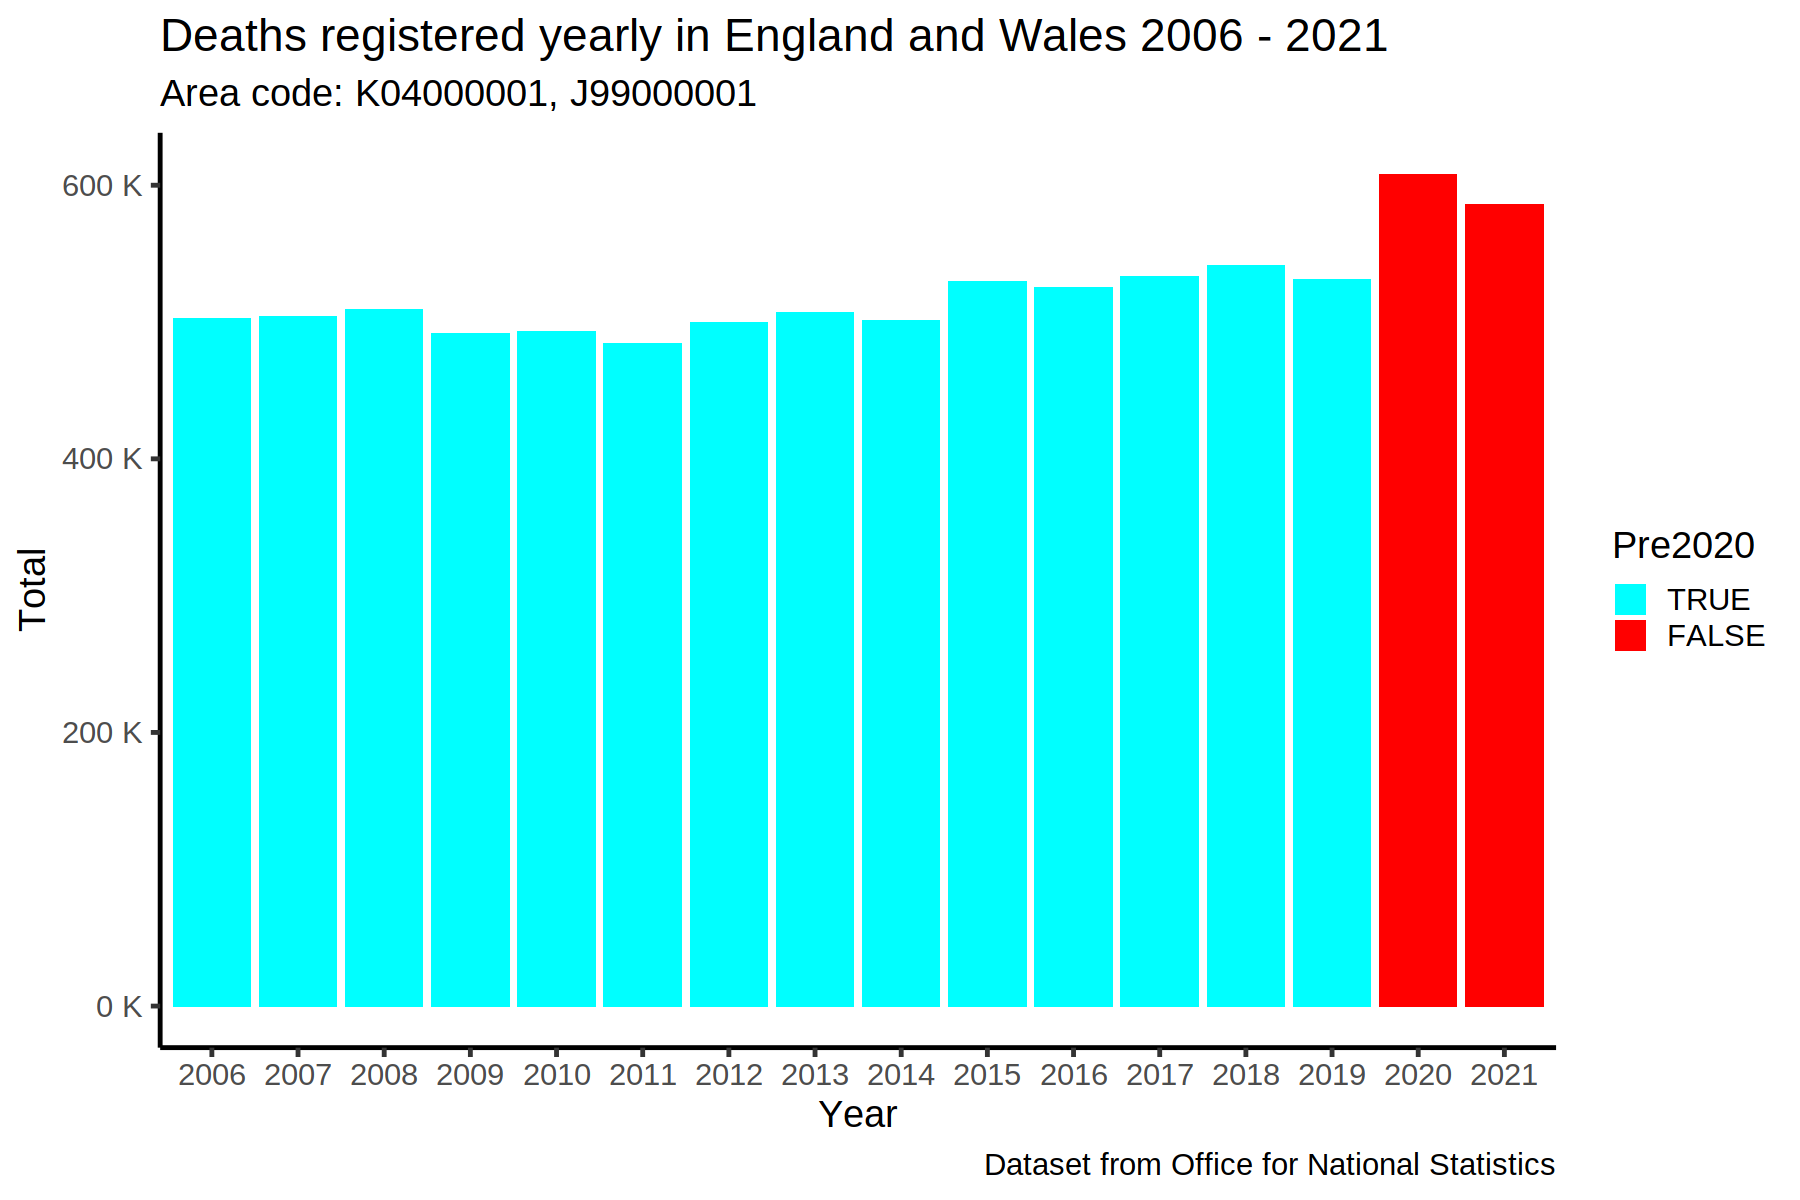

In [10]:
ggplot(total, aes(Year, Total, fill = Pre2020)) + 
    geom_col(size = 1, color = NA) + 
    scale_y_continuous(labels = unit_format(unit = "K", scale = 1e-3)) +
    scale_fill_manual(values = two_color) +
    theme_classic(base_size = 18) + labs(title = plot_title1, subtitle = plot_subtitle, caption = plot_caption)

### Show monthly total deaths (points and pointrange)

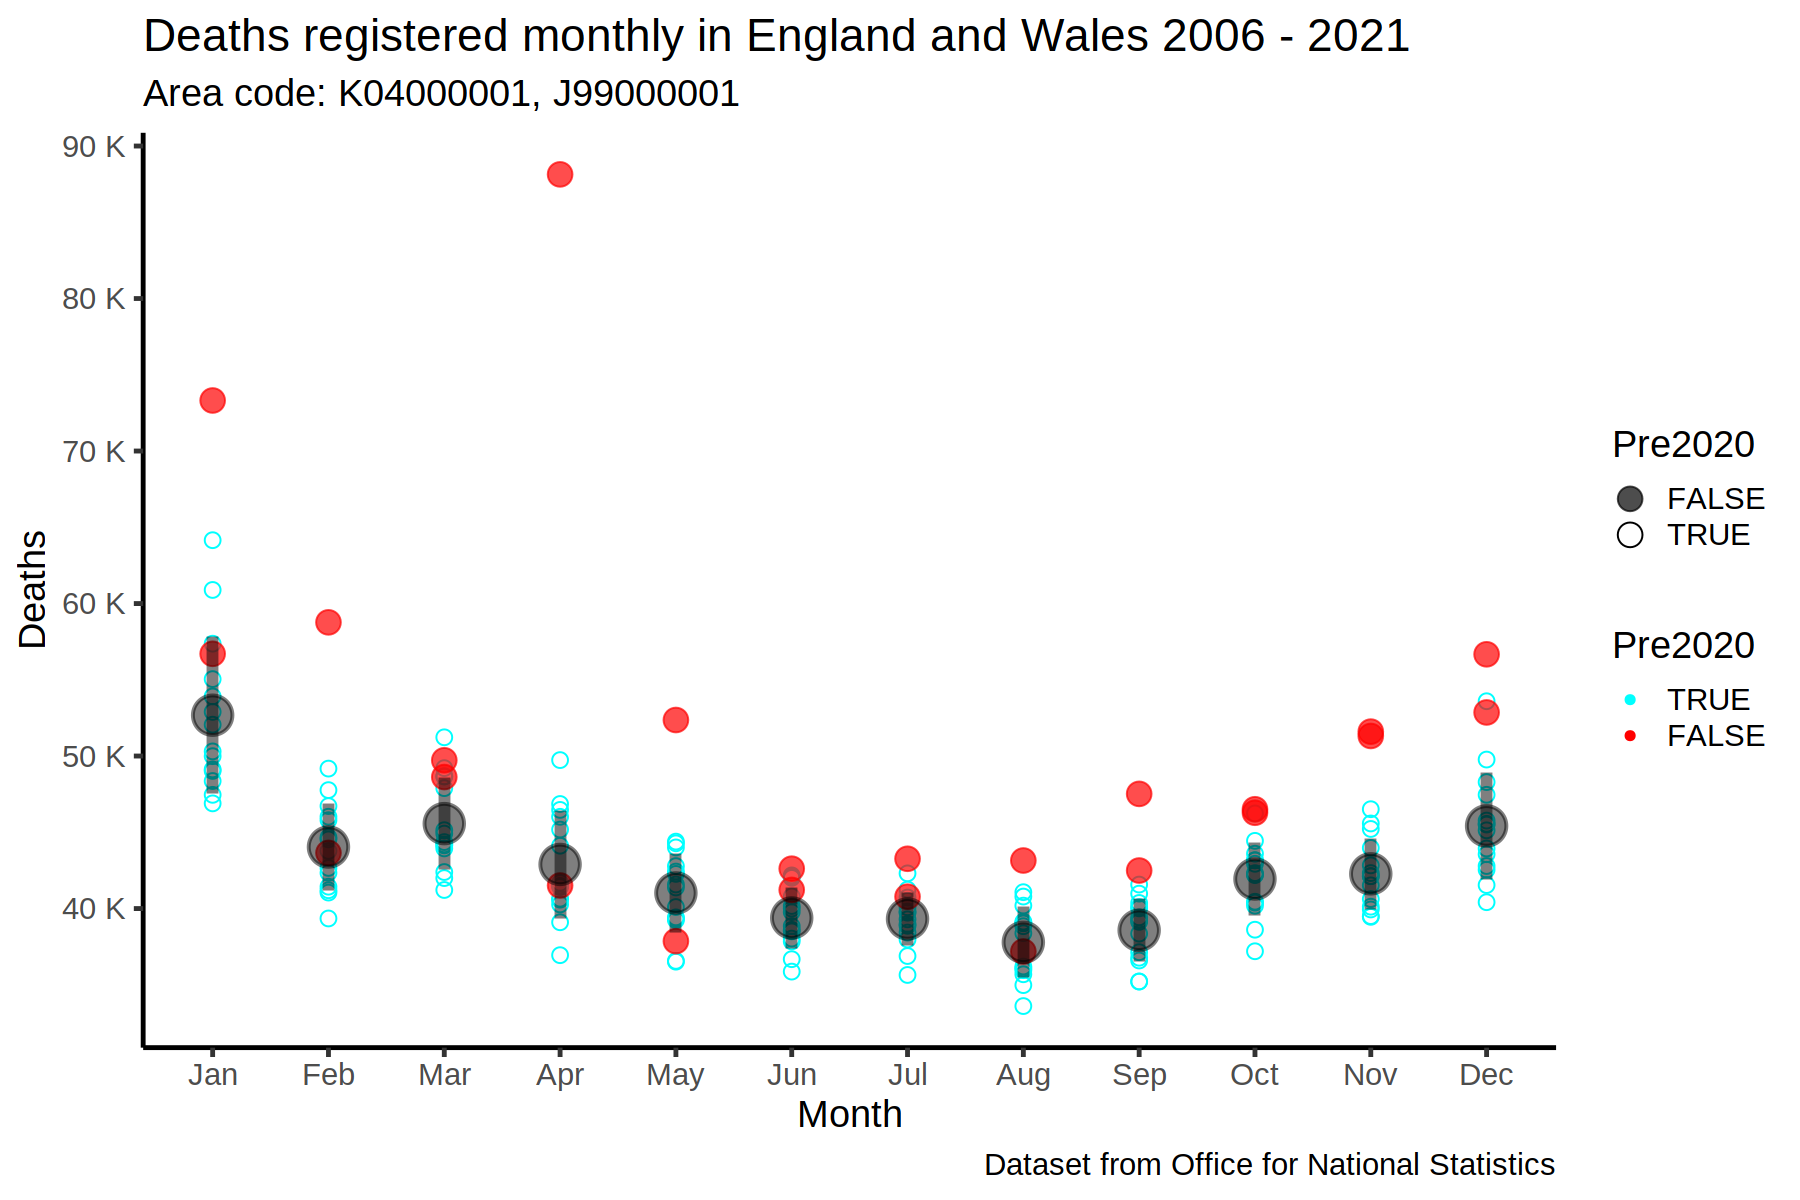

In [11]:
p <- ggplot(d, aes(Month, Deaths, color = Pre2020, size = Pre2020)) + 
    # Add point layer, then add pointrange layer next
    geom_point(aes(shape = Pre2020, alpha = Pre2020)) + 
    geom_pointrange(data = stat, aes(x = Month, y = Mean, ymin = Lower, ymax = Upper), 
                    color = "black", size = 2, alpha = 0.5) +
    scale_y_continuous(labels = unit_format(unit = "K", scale = 1e-3)) +
    scale_color_manual(values = two_color) + scale_alpha_manual(values = c(0.7, 1)) +
    scale_shape_manual(values = c(19, 1)) + scale_size_manual(values = c(5, 3)) +
    guides(size = guide_legend(override.aes = list(size = 5))) +
    theme_classic(base_size = 18) + labs(title = plot_title2, subtitle = plot_subtitle, caption = plot_caption)

p

### Show monthly total deaths (points and lines)

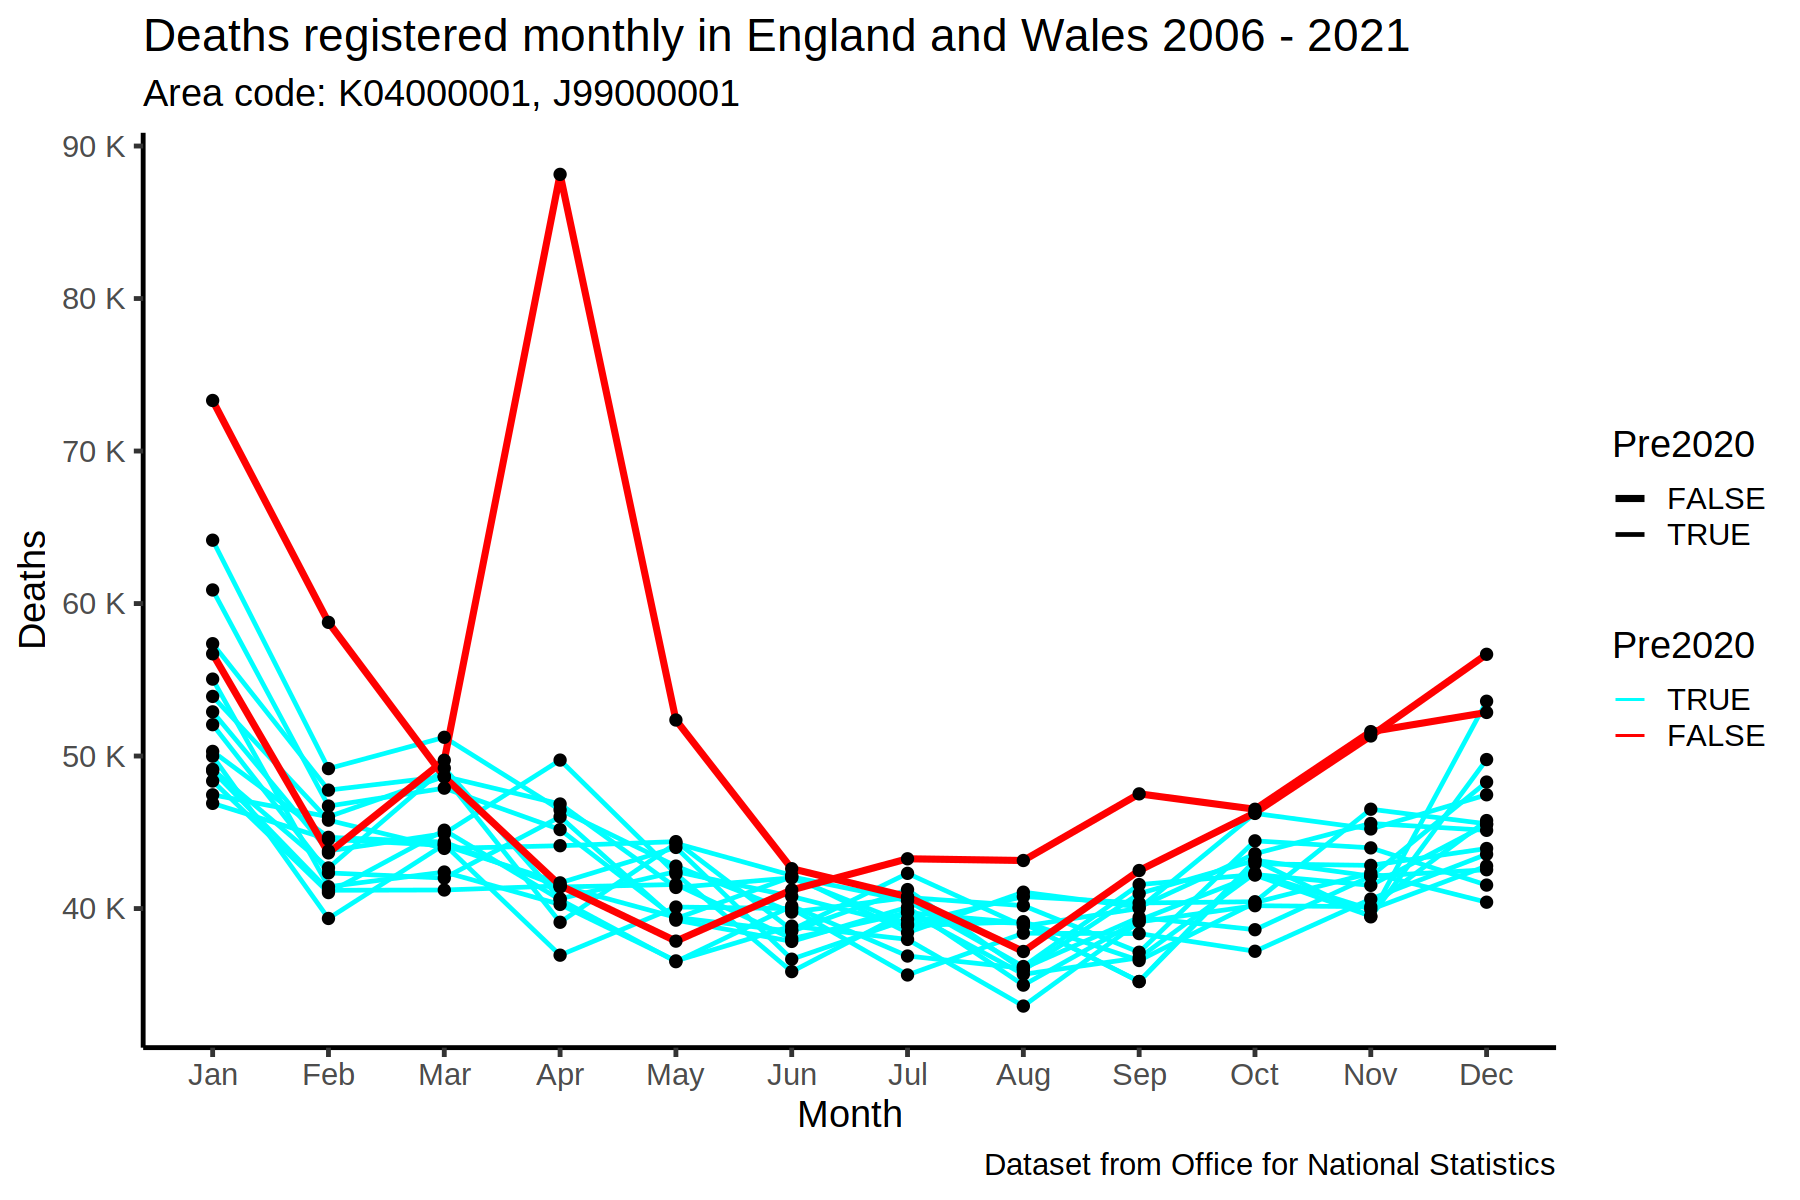

In [12]:
p <- ggplot(d, aes(Month, Deaths, group = Year, color = Pre2020, size = Pre2020)) + 
    # Add line layer, then add point layer next
    geom_line() + geom_point(color = "black", size = 2) +
    scale_y_continuous(labels = unit_format(unit = "K", scale = 1e-3)) +
    scale_color_manual(values = two_color) + scale_size_manual(values = c(1.2, 0.8)) +
    theme_classic(base_size = 18) + labs(title = plot_title2, subtitle = plot_subtitle, caption = plot_caption)

p

### Show monthly total deaths (points, lines and smoothings)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



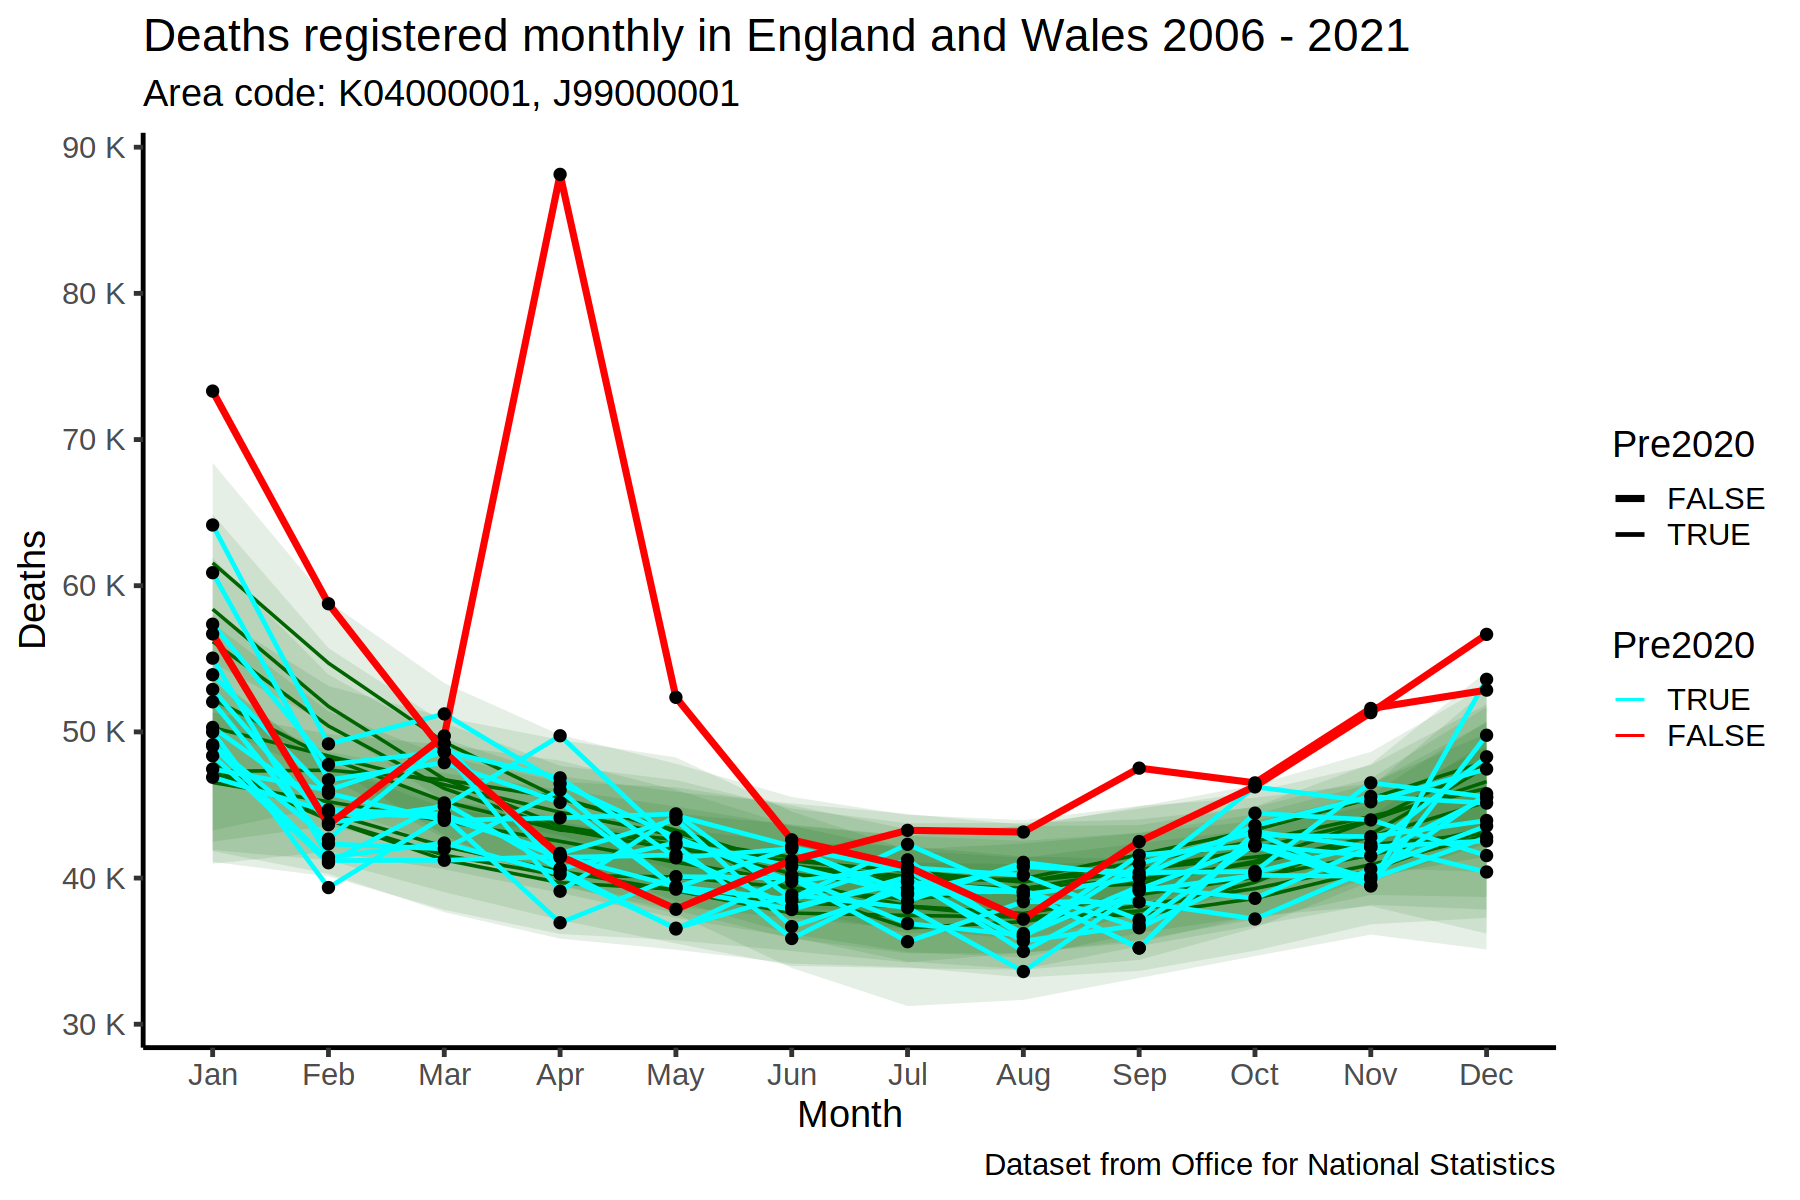

In [13]:
p <- ggplot(d, aes(Month, Deaths, group = Year, color = Pre2020, size = Pre2020)) + 
    # Add smoothings as the bottom layer, followed by lines and then points
    geom_smooth(data = d[grep("201", d$Year),], fill = "darkgreen", alpha = 0.1, color = "darkgreen", size = 0.6) +
    geom_line() + geom_point(color = "black", size = 2) + 
    scale_y_continuous(labels = unit_format(unit = "K", scale = 1e-3)) +
    scale_color_manual(values = two_color) + scale_size_manual(values = c(1.2, 0.8)) +
    theme_classic(base_size = 18) + labs(title = plot_title2, subtitle = plot_subtitle, caption = plot_caption)

p

### Save last image to file

In [14]:
png("ONS_Monthly_Deaths_Data_England_and_Wales.png", width = 9, height = 6, units = "in", res = 150)
p
dev.off()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



png 
  2

## 7. Session info

In [15]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/ihsuan/miniconda3_4.10.0/envs/r4/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C               LC_TIME=en_GB.UTF-8       
 [4] LC_COLLATE=en_GB.UTF-8     LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                  LC_ADDRESS=C              
[10] LC_TELEPHONE=C             LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] forcats_0.5.1   stringr_1.4.0   dplyr_1.0.7     purrr_0.3.4     readr_2.1.2     tidyr_1.2.0    
 [7] tibble_3.1.6    tidyverse_1.3.1 scales_1.1.1    ggplot2_3.3.5   readxl_1.3.1   

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.8       lattice_0.20-45  lubridate_1.8.0  assertthat_0.2.1 digest_0